In [1]:
import numpy as np
import pandas as pd
import cv2 
import os 
import tensorflow as tf
from PIL import Image

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train

(array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
          [168, 129,  94],
          [179, 142,  87],
   

In [4]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
#x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
#x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')

# Normalizing the images to the range of [0., 1.]
#x_train /= 255.
#x_test /= 255.
#print('Check that we have same data', x_train.shape, x_test.shape)

In [7]:
#before we run our fit function we know that it requires 2 dimensional data, so we have to reshape our input

X_train = x_train.reshape(len(x_train), -1)
X_test = x_test.reshape(len(x_test), -1)

#Optimization might require grayscale image

print(X_train.shape)

(50000, 3072)


In [8]:
Y_train = np.ravel(y_train)
Y_test = np.ravel(y_test)

In [9]:
x_train_gray = []
for i in x_train:
  img = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
  x_train_gray.append(img)

In [10]:
x_test_gray = []
for i in x_test:
  img = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
  x_test_gray.append(img)

In [11]:
x_train_gray = np.array(x_train_gray)
x_test_gray = np.array(x_test_gray)

In [12]:

X_train_gray = x_train_gray.reshape(len(x_train_gray), -1)
X_test_gray = x_test_gray.reshape(len(x_test_gray), -1)

#Optimization might require grayscale image

print(X_train_gray.shape)

(50000, 1024)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_gray)

X_train_gray= scaler.transform(X_train_gray)
X_test_gray = scaler.transform(X_test_gray)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logisticRegr = LogisticRegression(max_iter = 500, n_jobs = 3, multi_class = 'auto')

In [16]:
logisticRegr.fit(X_train_gray, Y_train)

C:\Users\Nika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=3, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
predictions = logisticRegr.predict(X_test_gray)

In [18]:
score = logisticRegr.score(X_test_gray, Y_test)
print(score)

0.278


In [19]:
import seaborn as sns
from sklearn import metrics

In [20]:
cm = metrics.confusion_matrix(Y_test, predictions)

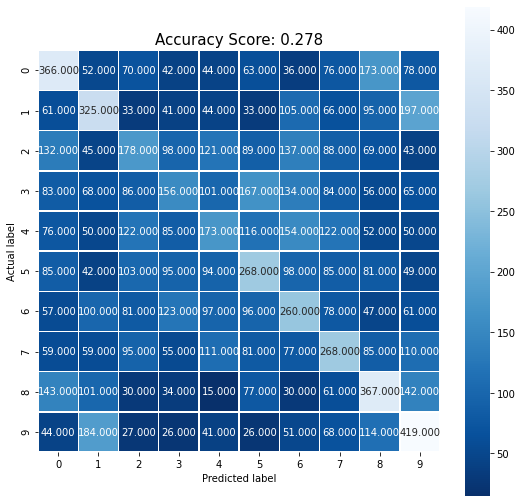

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()